In [1]:
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from matplotlib.style import reload_library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from machine_learning.config import EXTERNAL_DATA_DIR, MPLSTYLE_DIR

2025-02-23 10:05:38.382 | INFO     | machine_learning.config:<module>:11 - PROJ_ROOT path is: D:\Documents\3 Production Save Files\1 Cloned repositories\machine-learning


# Simple EDA

In [ ]:
reload_library()
plt.style.use(MPLSTYLE_DIR / "iragca_ml.mplstyle")

In [3]:
DATA_PATH = EXTERNAL_DATA_DIR / "kaggle" / "kabure"

RAW_DATA = pl.read_csv(DATA_PATH / "cannabis.csv")
RAW_DATA

Strain,Type,Rating,Effects,Flavor,Description
str,str,f64,str,str,str
"""100-Og""","""hybrid""",4.0,"""Creative,Energetic,Tingly,Euph…","""Earthy,Sweet,Citrus""","""$100 OG is a 50/50 hybrid stra…"
"""98-White-Widow""","""hybrid""",4.7,"""Relaxed,Aroused,Creative,Happy…","""Flowery,Violet,Diesel""","""The ‘98 Aloha White Widow is a…"
"""1024""","""sativa""",4.4,"""Uplifted,Happy,Relaxed,Energet…","""Spicy/Herbal,Sage,Woody""","""1024 is a sativa-dominant hybr…"
"""13-Dawgs""","""hybrid""",4.2,"""Tingly,Creative,Hungry,Relaxed…","""Apricot,Citrus,Grapefruit""","""13 Dawgs is a hybrid of G13 an…"
"""24K-Gold""","""hybrid""",4.6,"""Happy,Relaxed,Euphoric,Uplifte…","""Citrus,Earthy,Orange""","""Also known as Kosher Tangie, 2…"
…,…,…,…,…,…
"""Zeus-Og""","""hybrid""",4.7,"""Happy,Uplifted,Relaxed,Euphori…","""Earthy,Woody,Pine""","""Zeus OG is a hybrid cross betw…"
"""Zkittlez""","""indica""",4.6,"""Relaxed,Happy,Euphoric,Uplifte…","""Sweet,Berry,Grape""","""Zkittlez is an indica-dominant…"
"""Zombie-Kush""","""indica""",5.0,"""Relaxed,Sleepy,Talkative,Eupho…","""Earthy,Sweet,Spicy/Herbal""","""Zombie Kush by Ripper Seeds co…"


In [4]:
RAW_DATA.describe()

statistic,Strain,Type,Rating,Effects,Flavor,Description
str,str,str,f64,str,str,str
"""count""","""2351""","""2351""",2351.0,"""2351""","""2351""","""2351"""
"""null_count""","""0""","""0""",0.0,"""0""","""0""","""0"""
"""mean""",null,null,4.310634,null,null,null
"""std""",null,null,0.836394,null,null,null
"""min""","""100-Og""","""hybrid""",0.0,"""Aroused,Creative,Energetic,Eup…","""""",""""""
"""25%""",null,null,4.2,null,null,null
"""50%""",null,null,4.4,null,null,null
"""75%""",null,null,4.7,null,null,null
"""max""","""Zoom-Pie""","""sativa""",5.0,"""Uplifted,Tingly,Relaxed,Euphor…","""Woody,Sweet,Earthy""","""“Open your mind” with this hyb…"


In [5]:
RAW_DATA['Type'].value_counts()

Type,count
str,u32
"""sativa""",440
"""indica""",699
"""hybrid""",1212


# KNN Pipeline

### Preprocess data

In [6]:
df = (
    RAW_DATA
    .with_columns([
        pl.col("Effects").str.split(",").alias("Effects"),
        pl.col("Flavor").str.split(",").alias("Flavor")
    ])
)

df

Strain,Type,Rating,Effects,Flavor,Description
str,str,f64,list[str],list[str],str
"""100-Og""","""hybrid""",4.0,"[""Creative"", ""Energetic"", … ""Relaxed""]","[""Earthy"", ""Sweet"", ""Citrus""]","""$100 OG is a 50/50 hybrid stra…"
"""98-White-Widow""","""hybrid""",4.7,"[""Relaxed"", ""Aroused"", … ""Energetic""]","[""Flowery"", ""Violet"", ""Diesel""]","""The ‘98 Aloha White Widow is a…"
"""1024""","""sativa""",4.4,"[""Uplifted"", ""Happy"", … ""Creative""]","[""Spicy/Herbal"", ""Sage"", ""Woody""]","""1024 is a sativa-dominant hybr…"
"""13-Dawgs""","""hybrid""",4.2,"[""Tingly"", ""Creative"", … ""Uplifted""]","[""Apricot"", ""Citrus"", ""Grapefruit""]","""13 Dawgs is a hybrid of G13 an…"
"""24K-Gold""","""hybrid""",4.6,"[""Happy"", ""Relaxed"", … ""Talkative""]","[""Citrus"", ""Earthy"", ""Orange""]","""Also known as Kosher Tangie, 2…"
…,…,…,…,…,…
"""Zeus-Og""","""hybrid""",4.7,"[""Happy"", ""Uplifted"", … ""Energetic""]","[""Earthy"", ""Woody"", ""Pine""]","""Zeus OG is a hybrid cross betw…"
"""Zkittlez""","""indica""",4.6,"[""Relaxed"", ""Happy"", … ""Sleepy""]","[""Sweet"", ""Berry"", ""Grape""]","""Zkittlez is an indica-dominant…"
"""Zombie-Kush""","""indica""",5.0,"[""Relaxed"", ""Sleepy"", … ""Happy""]","[""Earthy"", ""Sweet"", ""Spicy/Herbal""]","""Zombie Kush by Ripper Seeds co…"


In [7]:
input = (
    df
    # .explode("Effects")
    .explode("Flavor")
    # .to_dummies("Effects")
    .to_dummies("Flavor")
    .drop(["Strain", "Description"])
    .drop("Rating")
    .drop("Effects")
    .unique()
)
input

Type,Flavor_,Flavor_Ammonia,Flavor_Apple,Flavor_Apricot,Flavor_Berry,Flavor_Blue,Flavor_Blueberry,Flavor_Butter,Flavor_Cheese,Flavor_Chemical,Flavor_Chestnut,Flavor_Citrus,Flavor_Coffee,Flavor_Diesel,Flavor_Earthy,Flavor_Flowery,Flavor_Fruit,Flavor_Grape,Flavor_Grapefruit,Flavor_Honey,Flavor_Lavender,Flavor_Lemon,Flavor_Lime,Flavor_Mango,Flavor_Menthol,Flavor_Mint,Flavor_Minty,Flavor_None,Flavor_Nutty,Flavor_Orange,Flavor_Peach,Flavor_Pear,Flavor_Pepper,Flavor_Pine,Flavor_Pineapple,Flavor_Plum,Flavor_Pungent,Flavor_Rose,Flavor_Sage,Flavor_Skunk,Flavor_Spicy/Herbal,Flavor_Strawberry,Flavor_Sweet,Flavor_Tar,Flavor_Tea,Flavor_Tobacco,Flavor_Tree,Flavor_Tropical,Flavor_Vanilla,Flavor_Violet,Flavor_Woody
str,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
"""indica""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""indica""",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""sativa""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""hybrid""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""hybrid""",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""indica""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
"""sativa""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
"""sativa""",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Perform KNN Grid Search

In [8]:
from machine_learning.modeling import pipepline
X, y = input.drop("Type"), input["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

knn = KNeighborsClassifier(n_neighbors=50, metric="hamming")

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.21052631578947367

2025-02-23 10:05:38.522 | INFO     | machine_learning.modeling.pipepline:grid_search:64 - Starting Grid Search for Cannabis. n_neighbors: range(1, 41), trials: 1


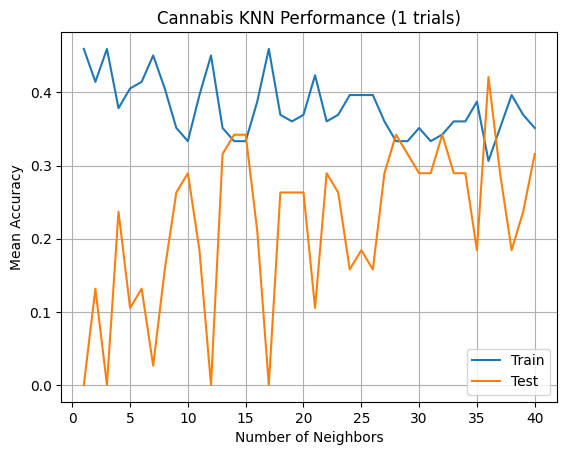

2025-02-23 10:05:39.376 | INFO     | machine_learning.modeling.pipepline:grid_search:85 - Finished Grid Search for Cannabis
 Train max accuracy: 0.4594594594594595
 Test max accuracy: 0.42105263157894735


In [9]:
cannabis_knn = pipepline.KNNPipeline(X, y, "Cannabis")

cannabis_results = cannabis_knn.grid_search(range(1, 41), trials=1, plot=True, test_size=0.25, metric="hamming")

['Effects_Aroused', 'Effects_Creative', 'Effects_Dry', 'Effects_Energetic', 'Effects_Euphoric', 'Effects_Focused', 'Effects_Giggly', 'Effects_Happy', 'Effects_Hungry', 'Effects_Mouth', 'Effects_None', 'Effects_Relaxed', 'Effects_Sleepy', 'Effects_Talkative', 'Effects_Tingly', 'Effects_Uplifted', 'Flavor_', 'Flavor_Ammonia', 'Flavor_Apple', 'Flavor_Apricot', 'Flavor_Berry', 'Flavor_Blue', 'Flavor_Blueberry', 'Flavor_Butter', 'Flavor_Cheese', 'Flavor_Chemical', 'Flavor_Chestnut', 'Flavor_Citrus', 'Flavor_Coffee', 'Flavor_Diesel', 'Flavor_Earthy', 'Flavor_Flowery', 'Flavor_Fruit', 'Flavor_Grape', 'Flavor_Grapefruit', 'Flavor_Honey', 'Flavor_Lavender', 'Flavor_Lemon', 'Flavor_Lime', 'Flavor_Mango', 'Flavor_Menthol', 'Flavor_Mint', 'Flavor_Minty', 'Flavor_None', 'Flavor_Nutty', 'Flavor_Orange', 'Flavor_Peach', 'Flavor_Pear', 'Flavor_Pepper', 'Flavor_Pine', 'Flavor_Pineapple', 'Flavor_Plum', 'Flavor_Pungent', 'Flavor_Rose', 'Flavor_Sage', 'Flavor_Skunk', 'Flavor_Spicy/Herbal', 'Flavor_Strawb

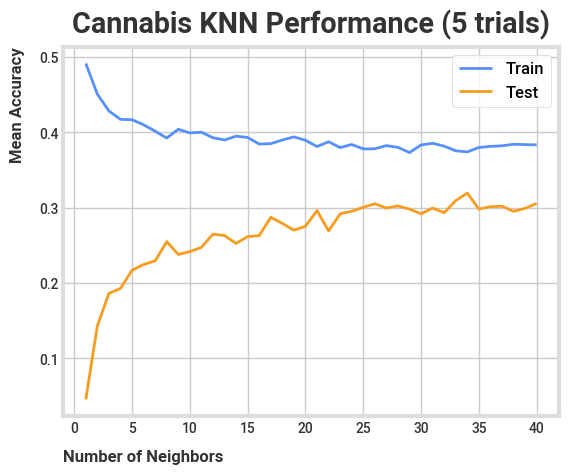

2025-02-23 10:06:09.563 | INFO     | machine_learning.modeling.pipepline:grid_search:85 - Finished Grid Search for Cannabis
 Train max accuracy: 0.4914691943127962
 Test max accuracy: 0.31943127962085305


In [11]:
input = (
    df
    .explode("Effects")
    .explode("Flavor")
    .to_dummies("Effects")
    .to_dummies("Flavor")
    .drop(["Strain", "Description"])
    .drop("Rating")
    # .drop("Effects")
    .unique()
)
X, y = input.drop("Type"), input["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X.columns)

cannabis_knn = pipepline.KNNPipeline(X, y, "Cannabis")

canabis_results = cannabis_knn.grid_search(range(1, 41), trials=5, plot=True, test_size=0.25, metric="hamming")